In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
%matplotlib inline

/Users/jaredgoldberg/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
cd~/Documents

/Users/jaredgoldberg/Documents


In [3]:
nhl_frame = pd.read_excel("NHL 2016-17.xls", header = 2) #this data contains information on each NHL player during the 
#2016-2017 NHL season

In [4]:
nhl_frame.head() #lets check out what our data looks like

,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,...,1st,2nd,3rd,MGL,Injuries,CHIP,NMC,Status,Salary,Cap Hit
0,1988-04-30,Hamilton,ON,CAN,CAN,69,170,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UFA,575000.0,575000.0
1,1987-02-25,Muskegon,MI,USA,USA,74,218,2005.0,2.0,42.0,...,0.0,0.0,1.0,18.0,"Lower body, Knee",932926.829268,NTC,UFA,5500000.0,4250000.0
2,1993-09-23,Stockholm,NaN,SWE,SWE,71,196,2012.0,2.0,37.0,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,RFA,842500.0,780833.0
3,1991-12-01,Johnston,RI,USA,USA,70,208,NaN,NaN,NaN,...,0.0,0.0,1.0,15.0,"Lower body, Upper body",144969.512195,NaN,RFA,892500.0,792500.0
4,1992-04-30,Morristown,NJ,USA,USA,72,202,2010.0,5.0,140.0,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,UFA,625000.0,625000.0


In [5]:
#Now, for future reference, lets see what each of our columns are
list(nhl_frame)

[u'Born',
 u'City',
 u'Pr/St',
 u'Cntry',
 u'Nat',
 u'Ht',
 u'Wt',
 u'DftYr',
 u'DftRd',
 u'Ovrl',
 u'Hand',
 u'NHLid',
 u'Last Name',
 u'First Name',
 u'Position',
 u'Team',
 u'GP',
 u'G',
 u'A',
 u'A1',
 u'A2',
 u'PTS',
 u'+/-',
 u'E+/-',
 u'PIM',
 u'Shifts',
 u'TOI',
 u'TOI.1',
 u'TOI/GP',
 u'TOI/GP.1',
 u'TOI%',
 u'IPP%',
 u'SH%',
 u'SV%',
 u'PDO',
 u'F/60',
 u'A/60',
 u'Pct%',
 u'Diff',
 u'Diff/60',
 u'iCF',
 u'iCF.1',
 u'iFF',
 u'iSF',
 u'iSF.1',
 u'iSF.2',
 u'ixG',
 u'iSCF',
 u'iRB',
 u'iRS',
 u'iDS',
 u'sDist',
 u'sDist.1',
 u'Pass',
 u'iHF',
 u'iHF.1',
 u'iHA',
 u'iHDf',
 u'iMiss',
 u'iGVA',
 u'iTKA',
 u'iBLK',
 u'iGVA.1',
 u'iTKA.1',
 u'iBLK.1',
 u'BLK%',
 u'iFOW',
 u'iFOL',
 u'iFOW.1',
 u'iFOL.1',
 u'FO%',
 u'%FOT',
 u'dzFOW',
 u'dzFOL',
 u'nzFOW',
 u'nzFOL',
 u'ozFOW',
 u'ozFOL',
 u'FOW.Up',
 u'FOL.Up',
 u'FOW.Down',
 u'FOL.Down',
 u'FOW.Close',
 u'FOL.Close',
 u'OTG',
 u'1G',
 u'GWG',
 u'ENG',
 u'PSG',
 u'PSA',
 u'G.Bkhd',
 u'G.Dflct',
 u'G.Slap',
 u'G.Snap',
 u'G.Tip',
 u

In [6]:
#First, lets find out which injuries happened the most in the NHL in 2016-2017 season
#making a list of injuries
injuries = nhl_frame["Injuries"].dropna()

In [7]:
injdict = {}
for injstr in injuries:
    for inj in injstr.lower().replace(" ", "").split(","):
        if inj in injdict.keys():
            injdict[inj] += 1
        else:
            injdict[inj] = 1
        
    
    

In [8]:
injseries = Series(injdict)

In [9]:
injseries

abdominal         4
achilles          2
ankle            12
appendectomy      1
arm               2
back              9
calf              1
chest             1
concussion       29
elbow             3
eye               2
facial            4
finger           12
flu              15
foot             20
groin            12
hamstring         1
hand             17
head              3
hernia            1
hip               9
illness          78
jaw               2
knee             33
leg              11
lowerbody       158
mid-body          1
mouth             1
neck             11
oblique           3
ribs              4
shoulder         17
soreness          1
thumb             1
undisclosed      60
upperbody       172
wrist             8
dtype: int64

In [10]:
#lets combine injuries that are the same
injseries["hand"] += injseries ["thumb"] + injseries["finger"]
injseries["ankle"] += injseries["achilles"]
injseries["facial"] += injseries["eye"] + injseries["jaw"] + injseries["mouth"]
injseries["illness"] += injseries["flu"]
injseries["concussion"] += injseries["head"]
injseries["leg"] += injseries["calf"]
injseries.drop(["thumb", "finger", "achilles", "eye", "jaw", "mouth", "flu", "head", "calf"], inplace = True)

In [11]:
injseries

abdominal         4
ankle            14
appendectomy      1
arm               2
back              9
chest             1
concussion       32
elbow             3
facial            9
foot             20
groin            12
hamstring         1
hand             30
hernia            1
hip               9
illness          93
knee             33
leg              12
lowerbody       158
mid-body          1
neck             11
oblique           3
ribs              4
shoulder         17
soreness          1
undisclosed      60
upperbody       172
wrist             8
dtype: int64

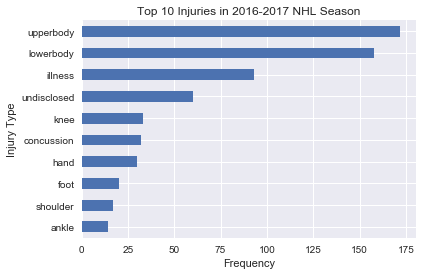

In [12]:
fig, axis = plt.subplots(1,1)
injseries.sort_values().tail(10).plot(kind = "barh", title = "Top 10 Injuries in 2016-2017 NHL Season", ax = axis)
axis.set_xlabel("Frequency")
axis.set_ylabel("Injury Type")
#We can see that many injuries are not specified, and are only reported as upper or lower body. 
#This is curious, and related to a 2008 rule about injury disclosure: 
#https://slapshot.blogs.nytimes.com/2008/11/10/the-morning-skate-nhls-new-injury-disclosure-policy-draws-heavy-criticism/
#Teams may not want to disclose injuries so opposing players cannot target

In [13]:
axis.clear()

In [14]:
#Lets create some useful stats for each player
now = datetime.now()
nhl_frame["Born"] = pd.to_datetime(nhl_frame["Born"])
nhl_frame["Age"] = (now - nhl_frame['Born']).astype('<m8[Y]')
nhl_frame["PPG"] = nhl_frame.PTS / nhl_frame.GP
nhl_frame.Position.unique()
positionlist = []
for each in nhl_frame.Position:
    if each == "LW":
        positionlist.append("Left Wing")
    elif each == "C":
        positionlist.append("Center")
    elif each == "D":
        positionlist.append("Defenseman")
    elif each == "RW":
        positionlist.append("Right Wing")
    elif ("LW" or "RW" or "C" in each) and ("D" in each):
        positionlist.append("Combination")
    elif ("LW" or "RW" or "C" in each) and not ("D" in each):
        positionlist.append("Combination Forward")
nhl_frame["Position_Group"] = positionlist
nhl_frame["Score_pct"] = nhl_frame.G / nhl_frame.iSF
nhl_frame["FO_PM"] = nhl_frame.iFOW - nhl_frame.iFOL
# nhl_frame["Shots"] = nhl_frame["S.Bkhd"] + nhl_frame["S.Dflct"] + nhl_frame["S.Slap"] + nhl_frame["S.Snap"] + nhl_frame["S.Tip"] + nhl_frame["S.Wrap"] + nhl_frame["S.Wrst"]
salbins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, 11000000, 12000000, 13000000, 14000000]
sallabels = ["< $1 million", "$1-$2 million", "$2-$3 million", "$3-$4 million", "$4-$5 million", "$5-$6 million", "$6-$7 million", "$7-$8 million", "$8-$9 million", "$9-$10 million", "$10-$11 million", "$11-$12 million", "$12-$13 million", "$13-$14 million"]
nhl_frame["Salary_group"] = pd.cut(nhl_frame.Salary, salbins, right = False, labels = sallabels)
nhl_frame["Injuries"].replace(np.nan, "", inplace = True)
numinj = []
for each in nhl_frame.Injuries:
    if len(each) == 0:
        numinj.append(0)
    else:
        numinj.append(len(each.split(",")))
nhl_frame["num_inj"] = numinj

In [15]:
#next, lets filter this data for different analyses 
nhl_frame_23 = nhl_frame[nhl_frame.GP >= 55] #played more than 2/3 of the season
nhl_frame_5exp = nhl_frame[nhl_frame.Age >= 26] #is an experienced player, more than 5 years experience


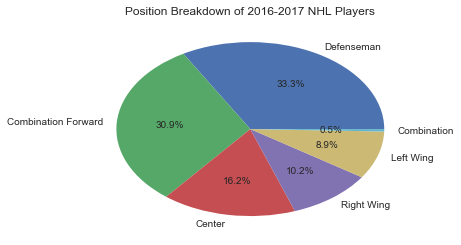

In [16]:
nhl_frame.Position_Group.value_counts().plot(kind = "pie", title = "Position Breakdown of 2016-2017 NHL Players", label = "", autopct='%1.1f%%')

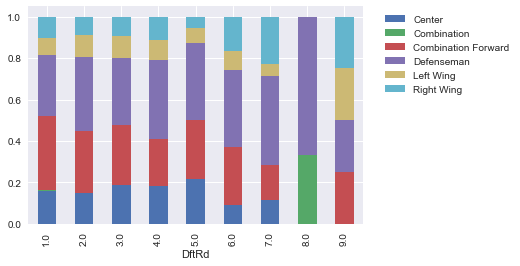

In [17]:
# nhl_frame.groupby(["DftRd", "Position_Group"]).size().unstack().plot(kind = "bar", stacked = True)
nhl_frame.groupby(["DftRd", "Position_Group"]).size().unstack().apply(lambda x: x/x.sum(), axis = 1).plot(kind = "bar", stacked = True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left") #proportion of players drafted in each round
#more forwards tend to be drafted than defenseman -- which makes sense; each team starts 12 forwards, but only 6 defenseman a game

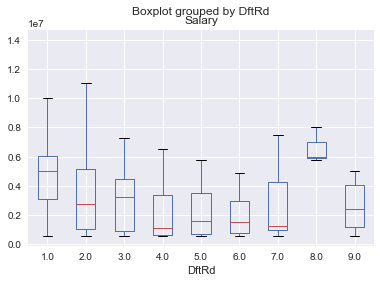

In [18]:
nhl_frame_5exp.boxplot(by = "DftRd", column = "Salary") #first round drafts picks tend to be paid higher

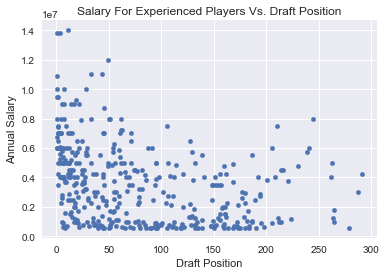

In [19]:
#looking at salary vs. draft year
fig, axis = plt.subplots(1,1)
nhl_frame_5exp.plot(kind = "scatter", x="Ovrl", y = "Salary", ax = axis, title = "Salary For Experienced Players Vs. Draft Position")
axis.set_xlabel("Draft Position")
axis.set_ylabel("Annual Salary")


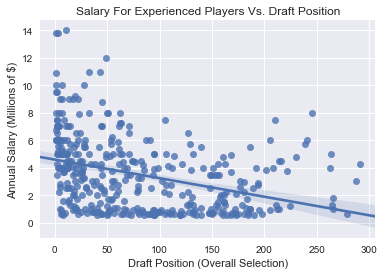

In [20]:
#lets use seaborn to visualize the relationship
sax = sns.regplot(x="Ovrl", y = "Salary", data = nhl_frame_5exp)
sax.set_title("Salary For Experienced Players Vs. Draft Position")
sax.set_yticklabels(["", 0, 2,4,6,8,10,12,14])
sax.set_xlabel("Draft Position (Overall Selection)")
sax.set_ylabel("Annual Salary (Millions of $)")

#As we expect, later draftees tend to have lower salaries

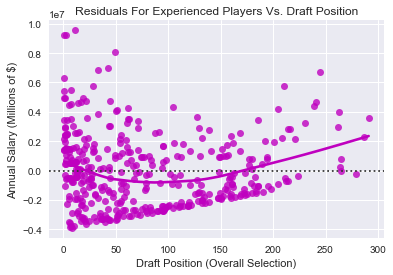

In [21]:
resid = sns.residplot(x="Ovrl", y = "Salary", data = nhl_frame_5exp, lowess = True, color = "m")
#plot to show pattern of residuals, reveals heteroscedasticity
resid.set_xlabel("Draft Position (Overall Selection)")
resid.set_ylabel("Annual Salary (Millions of $)")
resid.set_title("Residuals For Experienced Players Vs. Draft Position")

In [22]:
nhl_frame_5exp4model = nhl_frame_5exp.dropna(subset = ["Ovrl", "Salary"], how = "any")
x = nhl_frame_5exp4model.Ovrl
x = sm.add_constant(x)
y = nhl_frame_5exp4model.Salary
# x = np.vander(x,2)
salary_model = sm.OLS(y,x)
modelres = salary_model.fit()
print modelres.summary()
salslope = modelres.params["Ovrl"]
salint = modelres.params["const"]
def predicted_sal(ovrl): #THIS function will predict a salary based on overall draft position, derived from our linear model
    sal = salint + salslope*ovrl
    return sal
# x.corr(y)
#This shows us that as you are drafted lower, your salary tends to be lower


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     55.54
Date:                Tue, 07 Nov 2017   Prob (F-statistic):           5.98e-13
Time:                        18:58:50   Log-Likelihood:                -6311.4
No. Observations:                 391   AIC:                         1.263e+04
Df Residuals:                     389   BIC:                         1.263e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.591e+06   1.89e+05     24.228      0.0

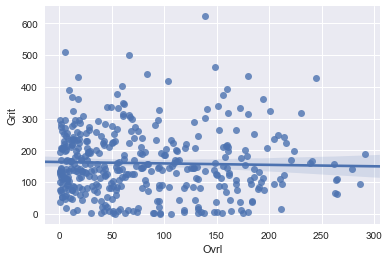

In [23]:
#How about Grit? Are lower drafted players more gritty?
#Grit is an actual stat, defined as hits, blocked shots, penalty minutes, and majors
gritty_draft = sns.regplot(data = nhl_frame_5exp, x = "Ovrl", y = "Grit")

In [24]:
#Now, we want to see how people are scoring goals in the nhl that year
#Our hypothesis is that defenseman, who play more at the point, score more of their goals via SLAPSHOT
#We also hypothesize that forward, who play closer to the net, score more of their goals with wrist or snap shots

In [25]:
nhl_frame.groupby("Position_Group").size()

Position_Group
Center                 144
Combination              4
Combination Forward    274
Defenseman             296
Left Wing               79
Right Wing              91
dtype: int64

                       G.Slap    G.Snap    G.Wrst    G.Bkhd
Position_Group                                             
Center               0.086957  0.170364  0.631766  0.110914
Combination          0.279070  0.209302  0.441860  0.069767
Combination Forward  0.094942  0.197761  0.585821  0.121476
Defenseman           0.359526  0.150700  0.446717  0.043057
Left Wing            0.072993  0.177007  0.636861  0.113139
Right Wing           0.091678  0.186178  0.612130  0.110014


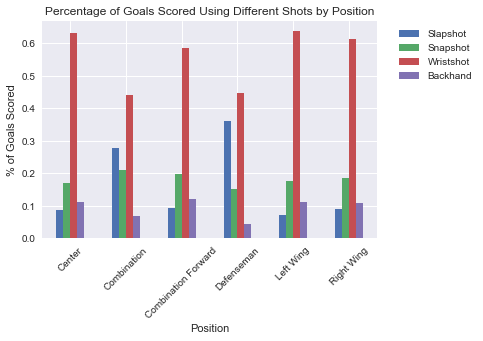

In [26]:
group_goal_pcts = nhl_frame.groupby("Position_Group")["G.Slap", "G.Snap", "G.Wrst", "G.Bkhd"].sum().apply(lambda x: x/x.sum(), axis = 1)
shots = ["Slapshot", "Snapshot", "Wristshot", "Backhand"]
print group_goal_pcts 
group_plt = group_goal_pcts.plot(kind = "bar", stacked = False)
group_plt.legend(shots, bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation = 45)
group_plt.set_xlabel("Position")
group_plt.set_ylabel("% of Goals Scored")
group_plt.set_title("Percentage of Goals Scored Using Different Shots by Position")
#We can see that Defenseman tend to score using slapshots much more often, which supports our hypothesis


In [27]:
#now lets statistically confirm the relationship between position and goal types
group_goal_tots = nhl_frame.groupby("Position_Group")["G.Slap", "G.Snap", "G.Wrst", "G.Bkhd"].sum()
chis, p_val, degof, expec = stats.chi2_contingency(group_goal_tots)
print "The p-value for our hypothesis of a relationship between position and goals scored in different ways is {}".format(p_val)
print "We reject the null hypothesis, and conclude there is a relationship between position and manner of scoring goals"
group_goal_tots

The p-value for our hypothesis of a relationship between position and goals scored in different ways is 7.94616681585e-101
We reject the null hypothesis, and conclude there is a relationship between position and manner of scoring goals


,G.Slap,G.Snap,G.Wrst,G.Bkhd
Position_Group,,,,
Center,98,192,712,125
Combination,12,9,19,3
Combination Forward,229,477,1413,293
Defenseman,334,140,415,40
Left Wing,40,97,349,62
Right Wing,65,132,434,78


                sum_sq     df         F    PR(>F)
Nat         356.679047    5.0  0.912061  0.472888
Residual  35509.094866  454.0       NaN       NaN
Our p-value is quite large, so it appears no single country on average has the most prolific goal scorers


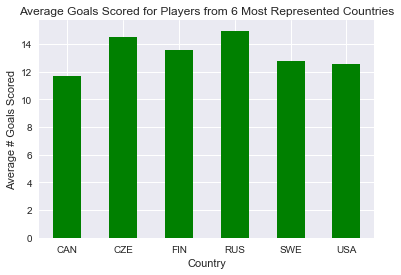

In [28]:
top_countries =  nhl_frame_23.groupby("Nat").size().sort_values(ascending = False).head(6).keys()
top_countries = [each for each in top_countries]
top_countries_frame = nhl_frame_23[nhl_frame_23["Nat"].isin(top_countries)]
cnty_plt = top_countries_frame.groupby("Nat")["G"].mean().plot(kind = "bar", title = "Average Goals Scored for Players from 6 Most Represented Countries", color = "g")
cnty_plt.set_xlabel("Country")
cnty_plt.set_ylabel("Average # Goals Scored")
plt.xticks(rotation = 0)
goal_mod = ols("G ~ Nat", data = top_countries_frame).fit()
goal_anova_output = sm.stats.anova_lm(goal_mod, typ = 2)
print goal_anova_output
print "Our p-value is quite large, so it appears no single country on average has the most prolific goal scorers"

In [29]:
#I am also curious about whether scoring efficiency (defined as goals scored per shots taken) is a predictor of total goals scored
#As in, do efficient scorers score more goals? 
nhl_frame_23["Score_pct"].corr(nhl_frame_23["G"])
#There appears to be a pretty strong correlation! Lets plot this relationship.

0.77690589073192573

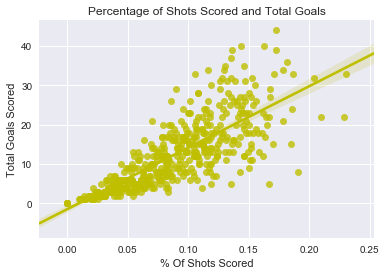

In [30]:
g_gp = sns.regplot(x="Score_pct", y = "G", data = nhl_frame_23, color = "y")
plt.title("Percentage of Shots Scored and Total Goals")
g_gp.set_xlabel("% Of Shots Scored")
g_gp.set_ylabel("Total Goals Scored")
#Quite the strong relationship

In [31]:
#Our next step is to see if playoff teams tend to have more efficient scoring
#first lets make a list of playoff teams from 2017-2017 season
traded = []
for each in nhl_frame_23.Team:
    if "/" in each:
        traded.append(False)
    else:
        traded.append(True)
nhl_frame_23_nt = nhl_frame_23[traded] #we just want players who werent traded to make it easier to organize the data
playoff_dict = {'DET': False, 'CAR': False, 'WSH' : True, 'CBJ' : True, 'CHI':True, 'WPG':False, 'NSH': True, 'BOS':True, 'CGY': True, 'VAN': False, 'NYI' : False, 'FLA': False, 'COL': False,  'MTL':True, 'PHI':False,'DAL':False, 'N.J': False, 'EDM': True, 'STL':True, 'ANA': True, 'S.J': True, 'BUF':False, 'PIT':True, 'OTT':True, 'TOR':True, 'MIN':True, 'L.A':False, 'T.B':False, 'ARI':False, 'NYR':True}
nhl_frame_23_nt["Playoff"] = nhl_frame_23_nt.Team.map(playoff_dict)


/Users/jaredgoldberg/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


0.0287182806276
Our p-value < .05, so we reject null hypothesis and conclude that players on playoff teams tend to score more goals on average


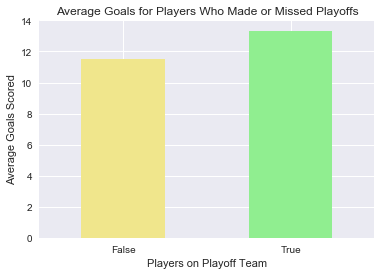

In [32]:
goal_pplot = nhl_frame_23_nt.groupby("Playoff")["G"].mean().plot(kind = "bar", color = ["khaki", "lightgreen"], title = "Average Goals for Players Who Made or Missed Playoffs")
goal_pplot.set_xlabel("Players on Playoff Team")
goal_pplot.set_ylabel("Average Goals Scored")
plt.xticks(rotation = 0)
#Lets perform an independent samples t-test at the 5% significance level to see if there is a statistical difference between goals scored
t,p,d = statsmodels.stats.weightstats.ttest_ind(nhl_frame_23_nt[nhl_frame_23_nt.Playoff == True]["G"],nhl_frame_23_nt[nhl_frame_23_nt.Playoff == False]["G"], usevar = "unequal")
print p
print "Our p-value < .05, so we reject null hypothesis and conclude that players on playoff teams tend to score more goals on average"

nan


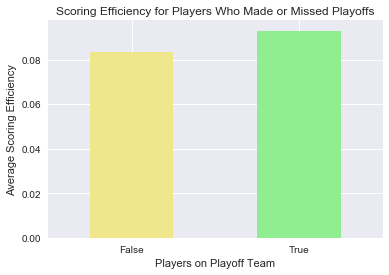

In [33]:
#Lets see if this same patters holds true for scoring efficiency
e_pplot = nhl_frame_23_nt.groupby("Playoff")["Score_pct"].mean().plot(kind = "bar", color = ["khaki", "lightgreen"], title = "Scoring Efficiency for Players Who Made or Missed Playoffs")
e_pplot.set_xlabel("Players on Playoff Team")
e_pplot.set_ylabel("Average Scoring Efficiency")
plt.xticks(rotation = 0)
#Lets perform an independent samples t-test at the 5% significance level to see if there is a statistical difference between goals scored
t,p,d = statsmodels.stats.weightstats.ttest_ind(nhl_frame_23_nt[nhl_frame_23_nt.Playoff == True]["Score_pct"],nhl_frame_23_nt[nhl_frame_23_nt.Playoff == False]["Score_pct"], usevar = "unequal")
print p

/Users/jaredgoldberg/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


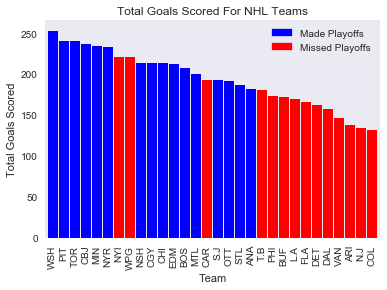

In [34]:
#Now, lets explore team by team predictors of playoff success
#well start with total goals scored
sortseries = nhl_frame_23_nt.groupby("Team")["G"].sum().sort_values(ascending = False)
sorted_teams = dict(sortseries.rank(ascending = False))
sorted_teams
nhl_frame_23_nt["Goal_rank"] = nhl_frame_23_nt["Team"].map(sorted_teams)
nhl_frame_23_nt_sort = nhl_frame_23_nt.sort_values("Goal_rank")
goal_teams = nhl_frame_23_nt_sort.groupby("Team")["G"].sum().sort_values(ascending = False)
playoffs = [playoff_dict[each] for each in goal_teams.keys()]
goal_teams = goal_teams.to_frame()
goal_teams["Playoffs"] = playoffs
bar_colors = []
for each in playoffs:
    if each == True:
        bar_colors.append("b")
    else:
        bar_colors.append("r")
goal_teams = goal_teams.reset_index()
g_plt = goal_teams.plot(kind = "bar", x = "Team", y = "G", color = bar_colors, width = .9, grid = False)
#p_gol_plt = sns.barplot(data=nhl_frame_23_nt_sort, x = "Team", y = "G", estimator = sum, hue ="Playoff", ci = None)
plt.title("Total Goals Scored For NHL Teams")
plt.xticks(rotation = 90)
plt.ylabel("Total Goals Scored")
r_patch = mpatches.Patch(color='r', label='Missed Playoffs')
b_patch = mpatches.Patch(color = "b", label = "Made Playoffs")
plt.legend(handles=[b_patch, r_patch])
#It is pretty clear that teams that score more goals tend to make the playoffs

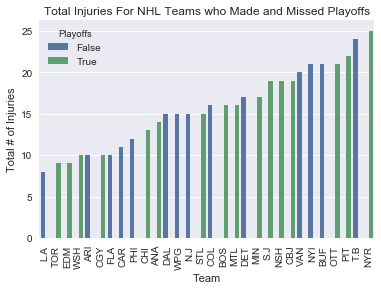

In [35]:
#you can always create a few dataframes and then merge them! 
#predictors of playoff success: goal differential, shot accuracy, goals, number of injuries, grit
inj_by_team = nhl_frame_23_nt.groupby("Team")["num_inj"].sum()
inj_by_team = inj_by_team.reset_index()
inj_by_team["Playoffs"] = inj_by_team["Team"].map(playoff_dict)
sns.barplot(data = inj_by_team.sort_values("num_inj"), x = "Team", y = "num_inj", hue = "Playoffs")
plt.title("Total Injuries For NHL Teams who Made and Missed Playoffs")
plt.xticks(rotation = 90)
plt.ylabel("Total # of Injuries")
#it is not as clear if injuries affect playoff birth